<a href="https://colab.research.google.com/github/tanoManzo/mimic_trajectories/blob/dev/MIMIC_TRAJECTORY_embeddings_02_graph_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import data**


In [97]:
import numpy as np
import pandas as pd

In [98]:
from google.colab import drive
drive.mount('/content/drive')
notes_path = "/content/drive/MyDrive/NIH/Data/"
notes_name = "NOTES_NURSING_TRAJECTORIES_multipleCG.csv"
df_notes = pd.read_csv(notes_path+notes_name)
df_notes.info()
df_notes.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CGID          1654 non-null   int64 
 1   SUBJECT_ID    1654 non-null   int64 
 2   emb_distance  1654 non-null   object
 3   attitudes     1654 non-null   object
dtypes: int64(2), object(2)
memory usage: 51.8+ KB


CGID  SUBJECT_ID  \
0  20020       25581   
1  20020       30176   
2  20020       26492   
3  20020       27648   
4  17155        1113   

                                                                                                                                                                                                                                      emb_distance  \
0                                                                                                                                                                                                         [0.4966087341308594, 0.3582078516483307]   
1                                                                                                                                                                                                                             [0.5194100141525269]   
2                                                                                                                                                                                    [0.46437036991119385, 0.7944238185882568, 0.7223639488220215]   
3                                                                                                                                                                                                                                               []   
4  [0.8100992441177368, 0.8087394833564758, 0.7620784640312195, 0.7747126817703247, 0.6777889132499695, 0.6328842639923096, 0.7247981429100037, 0.7391698360443115, 0.8150549530982971, 0.804926872253418, 0.7152000665664673, 0.7730017304420471]   

                                                                                                                                                                                                                                                                                                                      attitudes  
0                                                                                                                                                                                                                                                     ['Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note']  
1                                                                                                                                                                                                                                                                              ['Overall Neutral Note', 'Overall Neutral Note']  
2                                                                                                                                                                                                                              ['Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note']  
3                                                                                                                                                                                                                                                                                                      ['Overall Neutral Note']  
4  ['Overall Neutral Note', 'Overall Neutral Note', 'Overall Negative Note', 'Overall Negative Note', 'Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Negative Note', 'Overall Neutral Note', 'Overall Neutral Note', 'Overall Neutral Note']

Show attitudes

In [99]:
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#print(df_notes['attitudes'])

# **Find pattern in data**

convert sentiment to list of ints per dict

In [100]:
import ast

labels_dict = {'Overall Neutral Note': 0, 'Overall Negative Note': -1, 'Overall Positive Note': 1}
def attitude_from_dict(row):
  row_list = ast.literal_eval(row)
  return [labels_dict[val] for val in row_list]

df_notes['attitudes_char'] = df_notes['attitudes'].apply(attitude_from_dict)
#df_notes['attitudes_char']

repair data (from string to list)

In [101]:
def convert_to_list(row):
  row_list = ast.literal_eval(row)
  return row_list

df_notes['attitudes'] = df_notes['attitudes'].apply(convert_to_list)
df_notes['emb_distance'] = df_notes['emb_distance'].apply(convert_to_list)
df_notes

CGID  SUBJECT_ID  \
0     20020       25581   
1     20020       30176   
2     20020       26492   
3     20020       27648   
4     17155        1113   
5     20482       26134   
6     20482        4661   
7     20482       16612   
8     20482       26492   
9     20482        6552   
10    20482        7231   
11    20482       21910   
12    20817       16146   
13    20817       18924   
14    20817       15574   
15    20817       19501   
16    20817        6111   
17    20817        4821   
18    15002       30059   
19    15002       31468   
20    15002       28624   
21    15002       28446   
22    15002       27849   
23    15002       30402   
24    15002       29671   
25    15002       28989   
26    15002       31092   
27    15002       31597   
28    15002       30859   
29    15002       27073   
30    15002       29302   
31    15002       27250   
32    15002       30793   
33    15002       26962   
34    15002       30931   
35    15002       28614   
36    15002       29017   
37    15002       28833   
38    15002       30423   
39    15002       30742   
40    15002       26987   
41    15002       29181   
42    15002       31668   
43    15002       29013   
44    15002       31733   
45    15002       28990   
46    15002       30801   
47    15002       30898   
48    15002       31954   
49    15002       27262   
50    15002       29223   
51    15002       27769   
52    15002       30905   
53    15002       32556   
54    15002       31860   
55    15002       28618   
56    15002       27717   
57    15002       32537   
58    15002       31094   
59    15002       28577   
60    15002       27714   
61    15002       30533   
62    15002       26934   
63    15002       29499   
64    15002       29308   
65    15002       31097   
66    15002       28596   
67    16954       11465   
68    16954       13044   
69    16954       13786   
70    16954       25714   
71    16954        8078   
72    16954       26082   
73    16954        2782   
74    16954       11973   
75    16954       21796   
76    16954        3576   
77    16954        9095   
78    16954       13277   
79    16954       15752   
80    16954        2696   
81    16954       12515   
82    16954        3000   
83    16954       20890   
84    16954        4163   
85    16954       14331   
86    16954         997   
87    16954       17572   
88    16954        4146   
89    16954       23794   
90    15370       22011   
91    15370        7353   
92    15370        6476   
93    15370        8064   
94    15370       12172   
95    15370       16444   
96    15370        5141   
97    15370       15114   
98    15370       15909   
99    15370        4730   
100   15370       30905   
101   15370       31147   
102   15370       30931   
103   15370       19193   
104   15370       19199   
105   15370        6814   
106   15370        7653   
107   15370       18680   
108   15370        5306   
109   15370       18198   
110   15370        5025   
111   15370       32274   
112   15370       31668   
113   15370        7288   
114   15370        9872   
115   15370       17454   
116   15370       30727   
117   15370       14349   
118   15370       22345   
119   15370       24440   
120   15370       22484   
121   15370       27907   
122   15370       15980   
123   15370        7099   
124   15370       13243   
125   15370        7082   
126   15370       21260   
127   15370        2796   
128   15370        3350   
129   15370       22220   
130   15370       21007   
131   15370       25298   
132   15370       31921   
133   15370       13000   
134   15370       30423   
135   15370       24974   
136   15370       10977   
137   15370       32022   
138   15370       25695   
139   15370        1504   
140   15370       29396   
141   15370       30417   
142   15370        6674   
143   15370       29655   
144   15370         167   
145   15370       12428   
146   15370       24176   
147   15370

find where sentiment changes

In [102]:
def compare_adjacent_values(row):
  result = []
  for i in range(len(row) - 1):
    if row[i] == row[i+1]:
      #print(i, row[i], row[i+1])
      result.append(0)
    else:
      #print(row[i], row[i+1])
      result.append(1)
  return result

df_notes['Sentiment_Change'] = df_notes['attitudes_char'].apply(compare_adjacent_values)

pd.set_option('display.max_colwidth', None)
#print(df_notes['Sentiment_Change'])

filter for sentiment changes

In [103]:
def find_sentiment_changes(row):
  return any(val != 0 for val in row)

mask = df_notes['Sentiment_Change'].apply(find_sentiment_changes)
sentiment_change = df_notes[mask]
sentiment_neutral = df_notes[~mask]
sentiment_change

CGID  SUBJECT_ID  \
0     20020       25581   
4     17155        1113   
8     20482       26492   
30    15002       29302   
83    16954       20890   
253   15402       11465   
257   15402       15212   
266   15402        8630   
294   15402       10354   
316   15402       14151   
322   16638        2555   
336   16638       25642   
452   17101       18680   
502   17101        2976   
504   17101        7967   
544   17101       10730   
571   17101        2634   
583   17101       11211   
644   15167        4832   
645   15167        4515   
656   15167       20961   
677   15167       26444   
693   15167       13000   
698   15167       25695   
791   20282        7531   
877   20282       29302   
888   20282        7011   
895   20282       28833   
1653  19199       25398   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 emb_distance  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [0.4966087341308594, 0.3582078516483307]   
4                                                                                                                                                                                                                                                                                                                                                                                                                                             [0.8100992441177368, 0.8087394833564758, 0.7620784640312195, 0.7747126817703247, 0.6777889132499695, 0.6328842639923096, 0.7247981429100037, 0.7391698360443115, 0.8150549530982971, 0.804926872253418, 0.7152000665664673, 0.7730017304420471]   
8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [0.759245753288269, 0.8237338066101074, 0.6554104685783386]   
30                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# **Add labels to graph**

In [104]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [120]:
def plot_cgid(dist, sentiment):
  sns.scatterplot(dist)
  model_labels = sentiment
  labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
  graph_labels = [labels_dict[label] for label in model_labels]

  # Title and x/y axes
  plt.title("Sentence Comparison of Cosine Similarity and Sentiment")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(model_labels))]
  ax.set_xticklabels(new_ticks)

  # Y-axis tick marks
  ax.set_ylim(0,1)

  # Add sentiment next to points
  for index, row in enumerate(dist):
    x_position = index - 0.015*len(graph_labels)
    x2_position = index + 0.0075*len(graph_labels)
    y_position = dist[index] - 0.01
    plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')
    plt.text(x2_position, y_position, graph_labels[index+1], fontsize=10, color='red')

  # Legend
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]
  #legend_handles = [Text(0, 0, label=f"{short_label}: {original_label}") for original_label, short_label in labels_dict.items()]

  # legend under graph
  plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels_dict), title='Sentence Sentiment')

  plt.show()

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


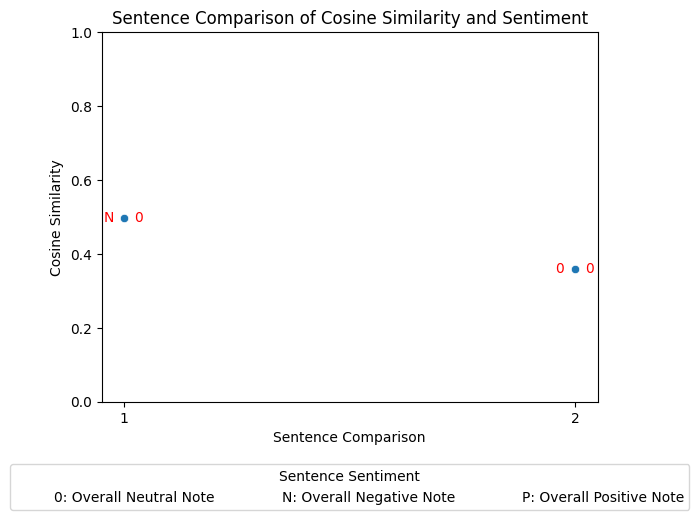

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


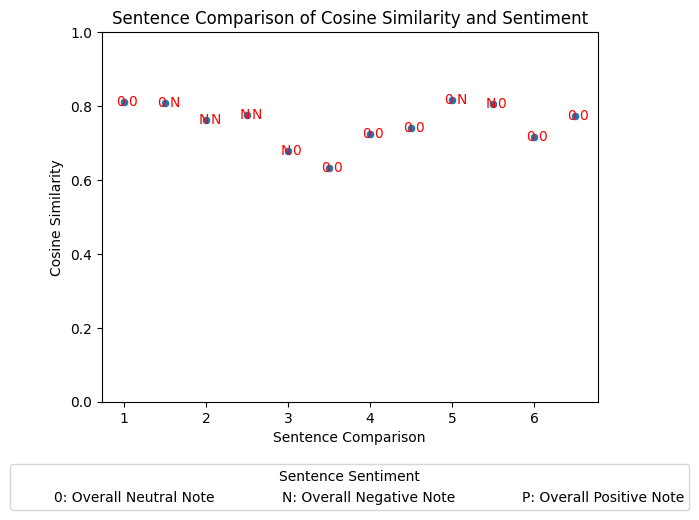

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


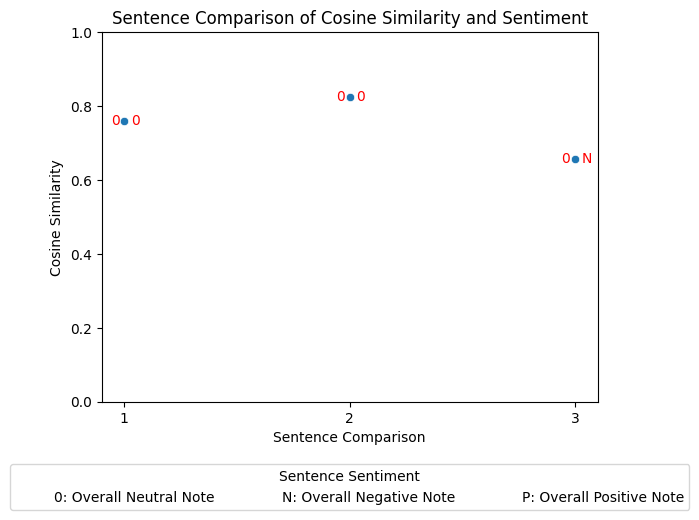

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


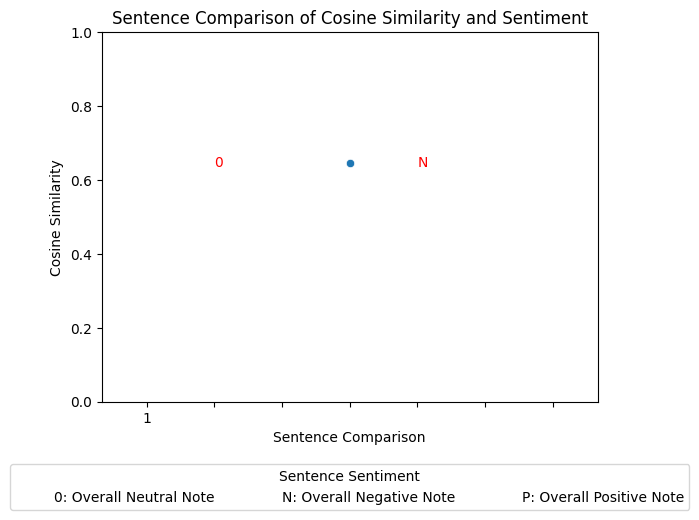

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


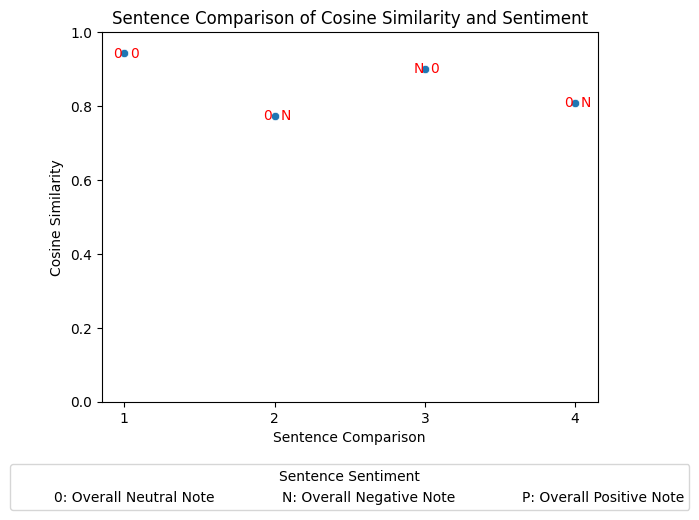

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


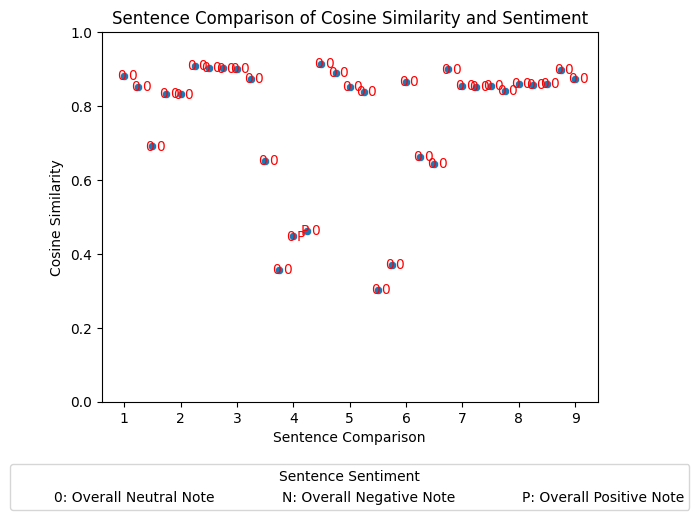

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


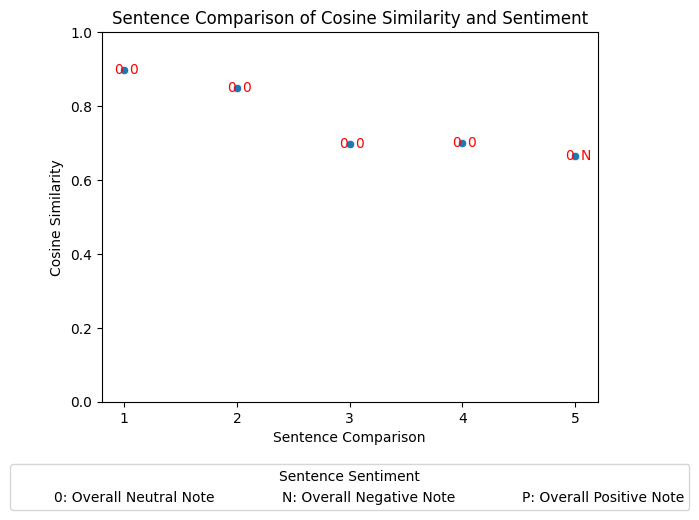

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


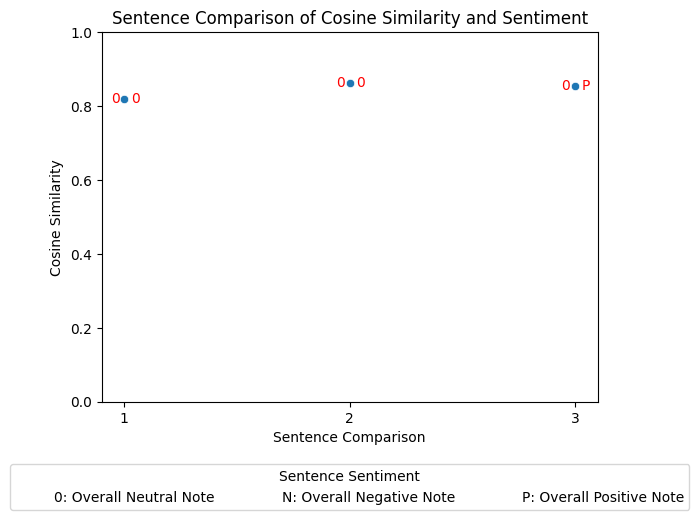

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


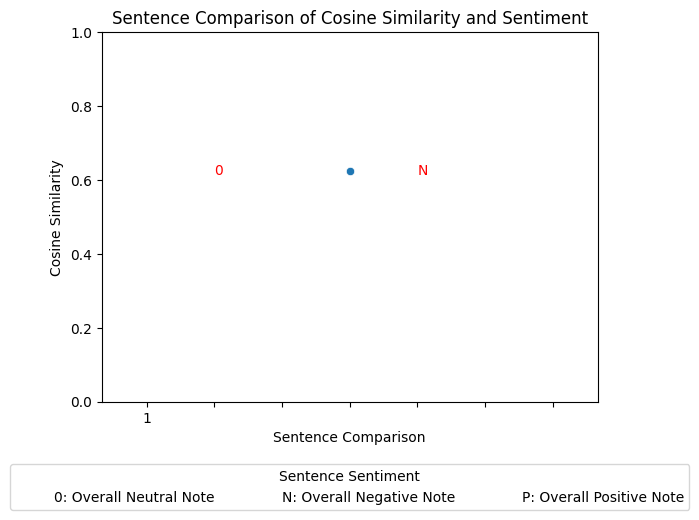

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


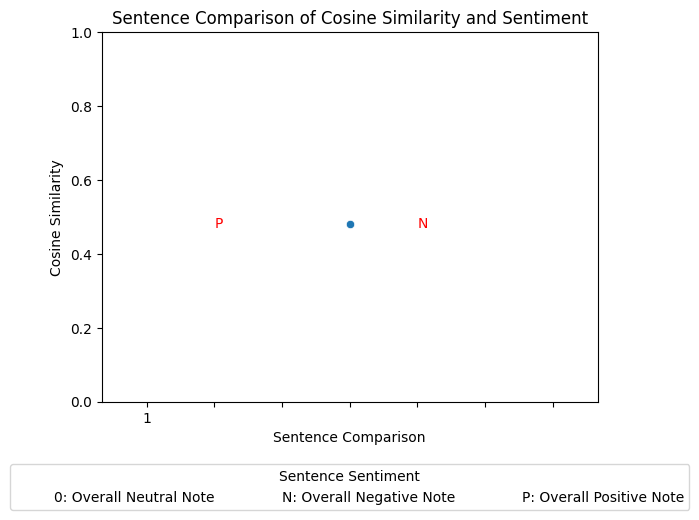

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


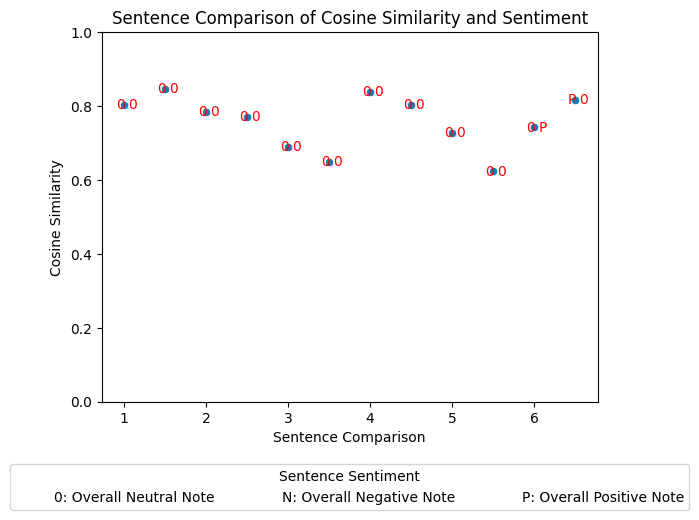

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


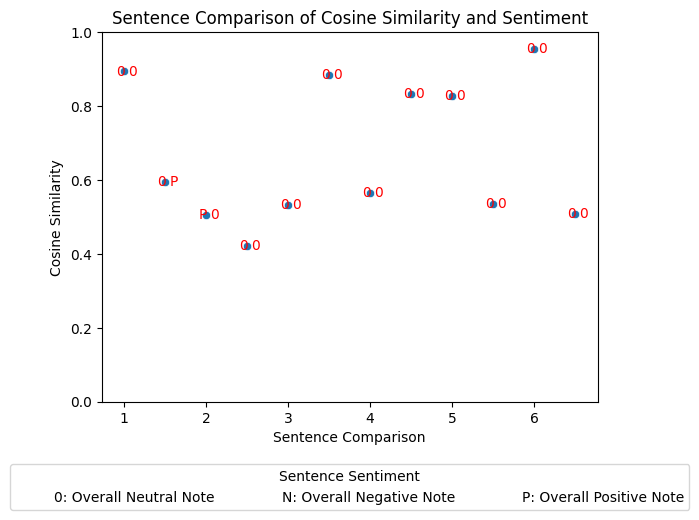

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


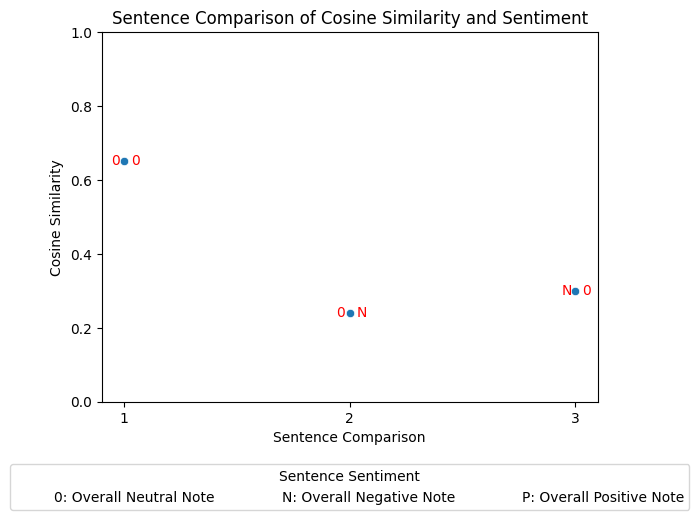

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


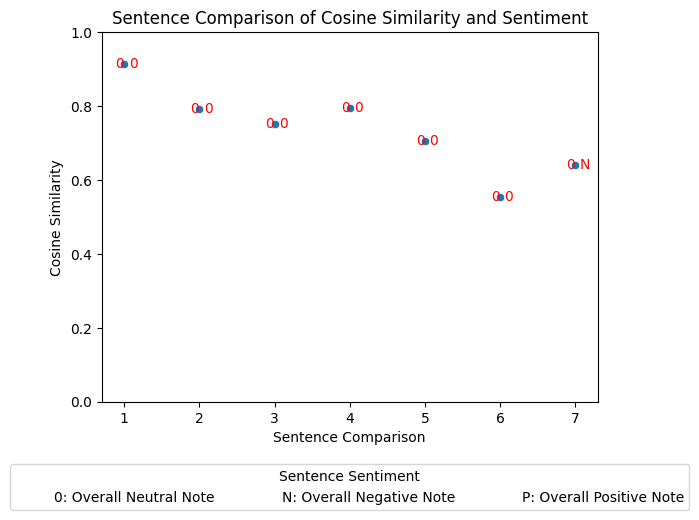

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


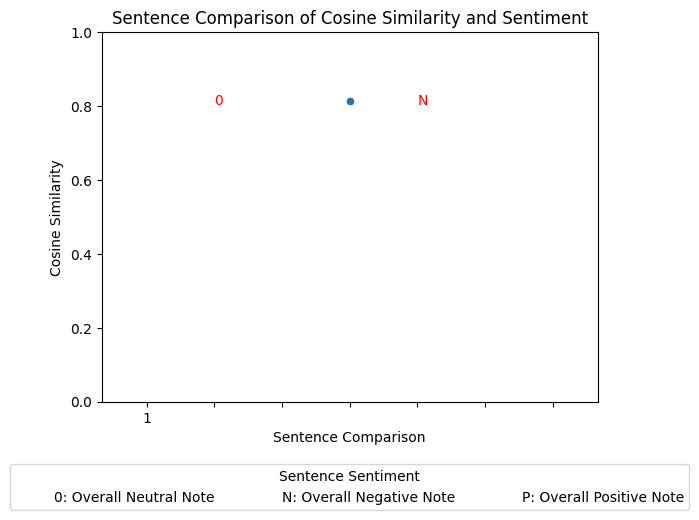

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


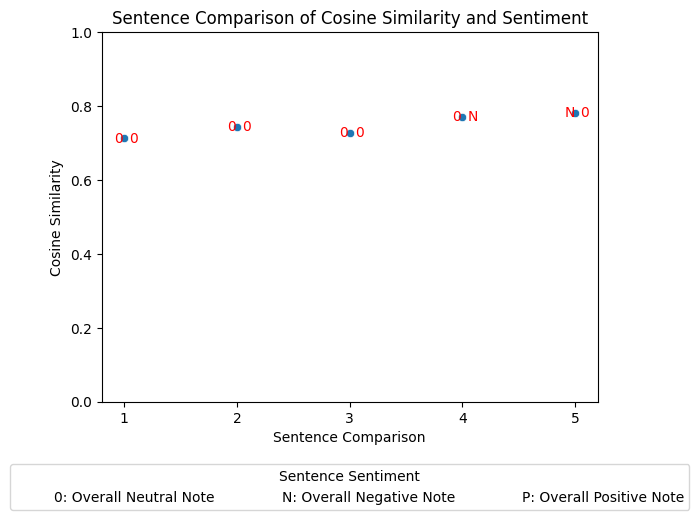

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


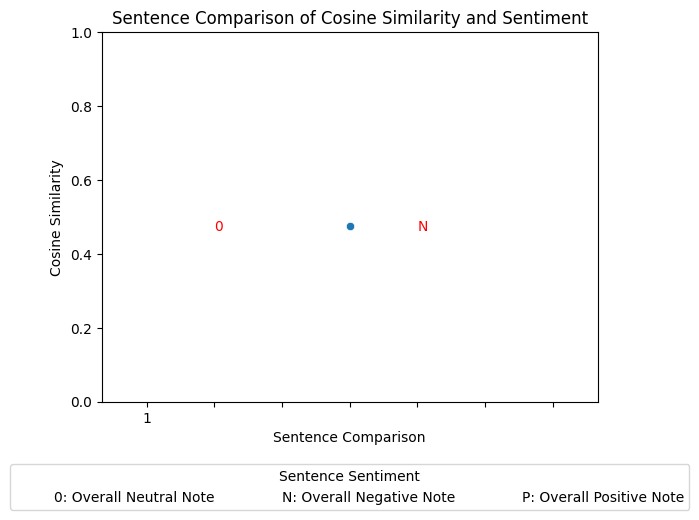

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


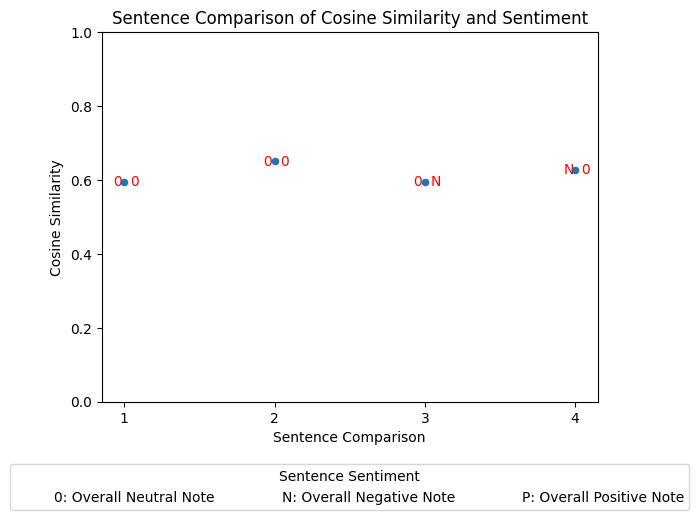

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


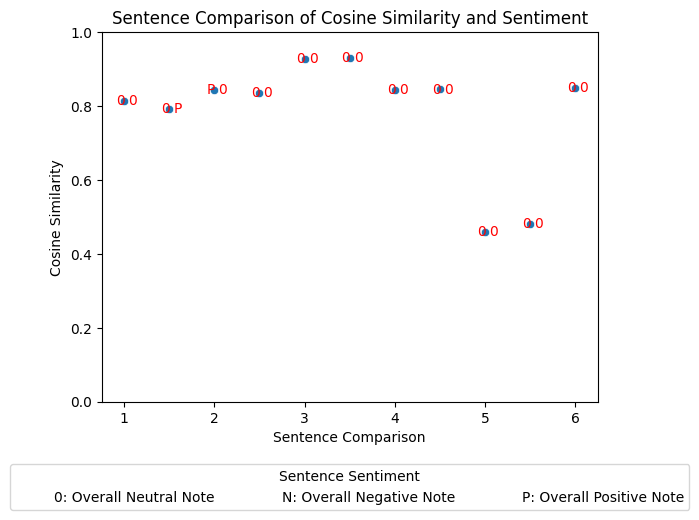

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


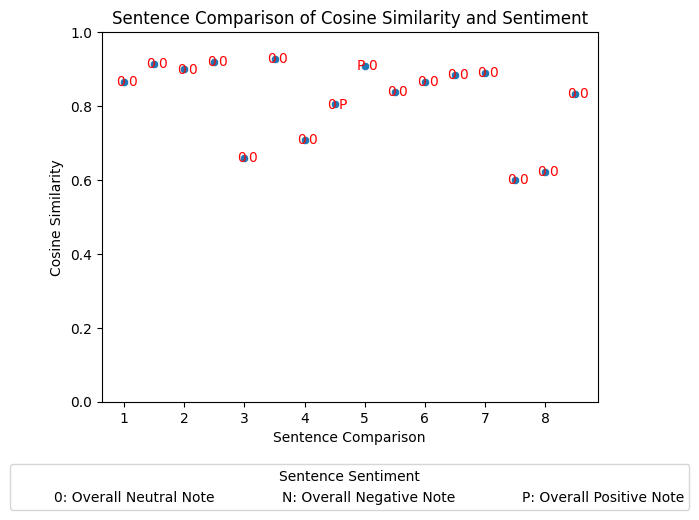

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


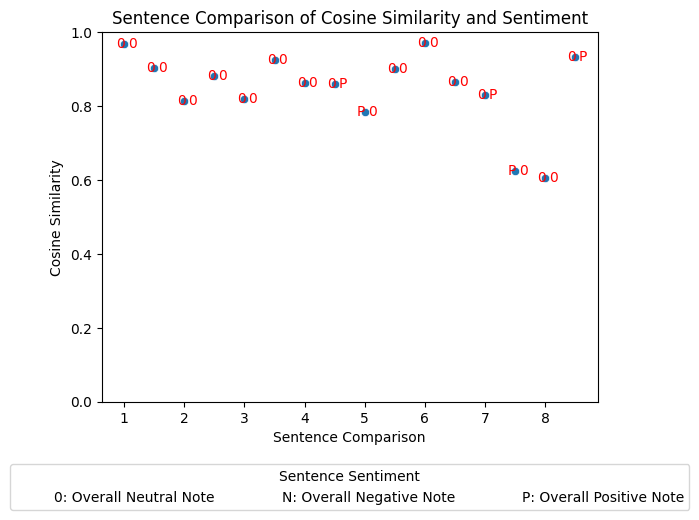

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


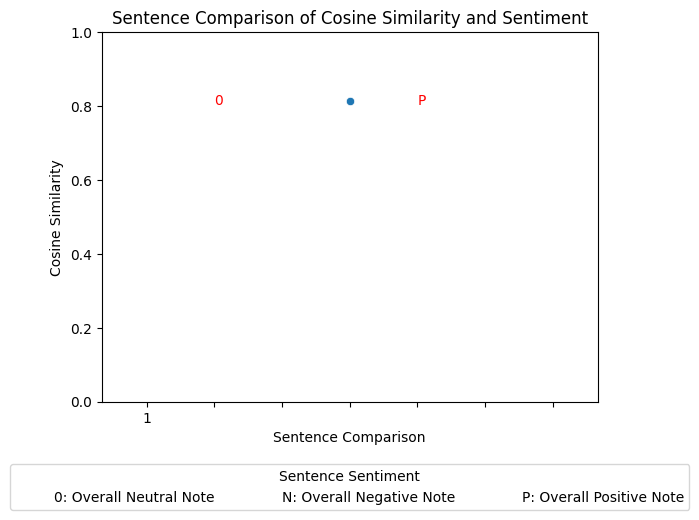

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


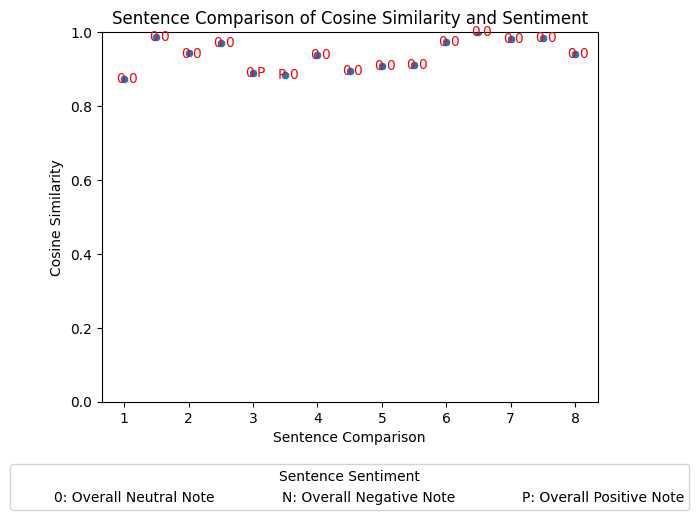

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


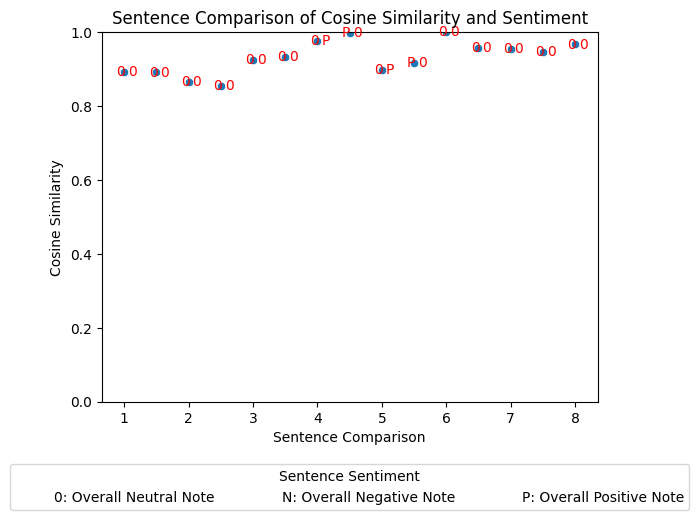

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


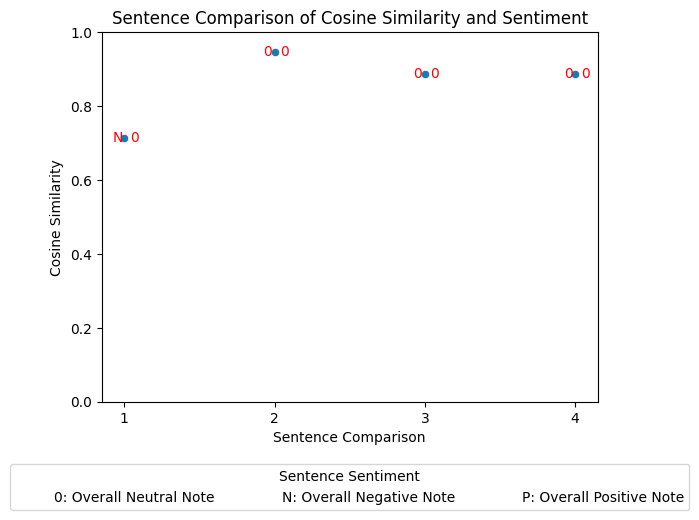

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


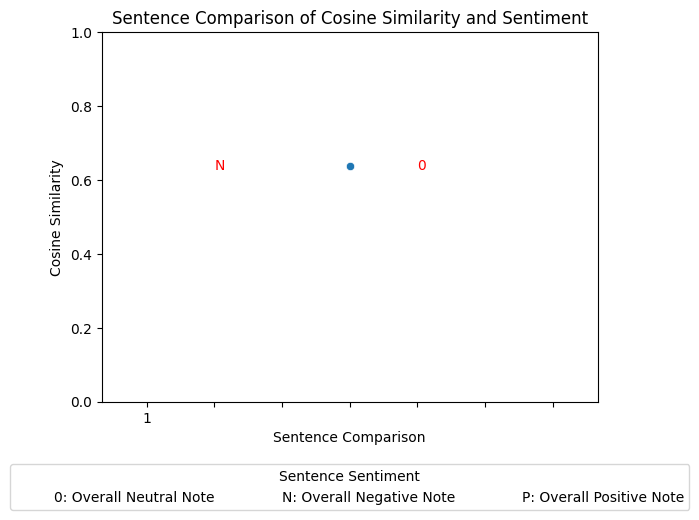

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


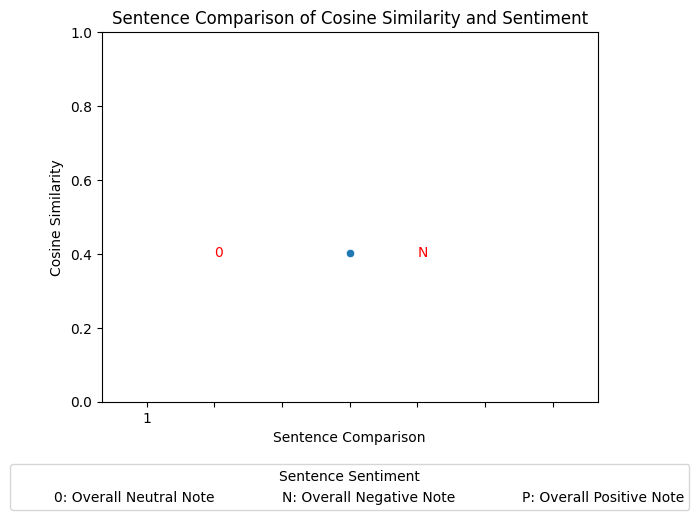

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


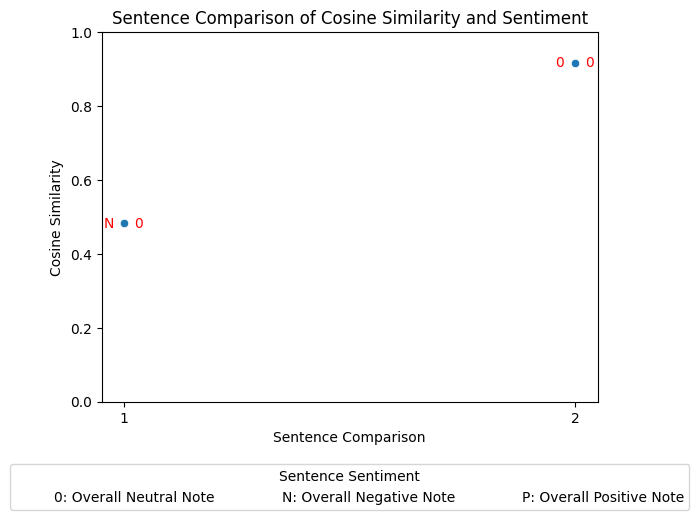

<ipython-input-120-832a3efd5033>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)


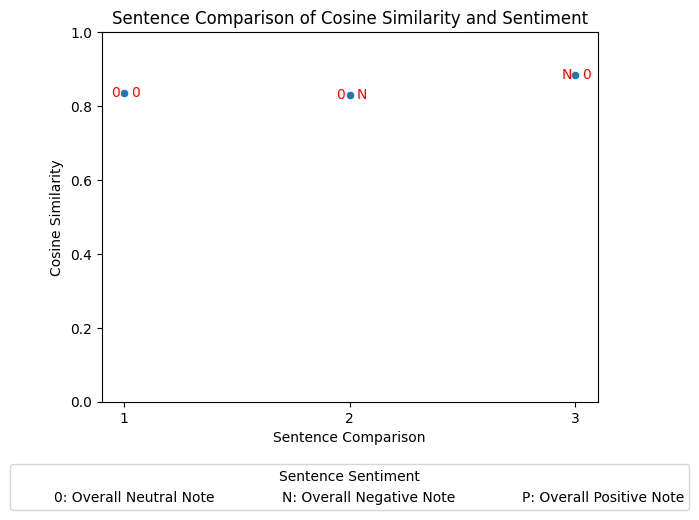

In [121]:
for index, row in sentiment_change.iterrows():
  plot_cgid(row['emb_distance'], row['attitudes'])


In [95]:
def plot_cgid_1(dist, sentiment):
  sns.scatterplot(dist)
  model_labels = sentiment
  labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
  graph_labels = [labels_dict[label] for label in model_labels]

  # Add sentiment next to points
  for index, row in enumerate(dist):

    x_position = index - 0.15
    x2_position = index + 0.075
    y_position = dist[index] - 0.0075
    plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')
    plt.text(x2_position, y_position, graph_labels[index+1], fontsize=10, color='red')

  # Title and x/y axes
  plt.title("Sentence Comparison of Cosine Similarity and Sentiment")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(graph_labels))]
  ax.set_xticklabels(new_ticks)

  # Legend
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]
  #legend_handles = [Text(0, 0, label=f"{short_label}: {original_label}") for original_label, short_label in labels_dict.items()]

  # legend to right of graph
  #plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment')

  # legend under graph
  plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels_dict), title='Sentence Sentiment')

  plt.show()

In [96]:
def plot_cgid_2(dist, sentiment):
  sns.scatterplot(dist)
  model_labels = l_labels['roberta']
  labels_dict = {'Overall Neutral Note': '0', 'Overall Negative Note': 'N', 'Overall Positive Note': 'P'}
  graph_labels = [labels_dict[label] for label in model_labels]

  # Add sentiment next to points
  plt.text(-0.15, dist[0]-.0075, graph_labels[0], fontsize=10, color='red')
  for index, row in enumerate(dist):
    if index == 0:
      continue
    x_position = index - 0.5
    x2_position = index + 0.075
    y_position = (dist[index] + dist[index-1] - 0.0075)/2
    plt.text(x_position, y_position, graph_labels[index], fontsize=10, color='red')
  plt.text(len(dist)-1+0.075, dist[len(dist)-1]-0.0075, graph_labels[len(dist)], fontsize=10, color='red')

  # Title and x/y axes
  plt.title("Sentence Comparison of Cosine Similarity and Sentiment")
  plt.xlabel("Sentence Comparison")
  plt.ylabel("Cosine Similarity")

  # X-axis tick marks
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  new_ticks = [str(i) for i in range(len(graph_labels))]
  ax.set_xticklabels(new_ticks)

  # Legend
  legend_handles = [Rectangle((0, 0), 0, 0, alpha=0, label=f"{short_label}: {original_label}") 
                    for original_label, short_label in labels_dict.items()]
  #legend_handles = [Text(0, 0, label=f"{short_label}: {original_label}") for original_label, short_label in labels_dict.items()]

  # legend to right of graph
  #plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment')

  # legend under graph
  plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels_dict), title='Sentence Sentiment')

  plt.show()